**Paisa Bazar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/dataset-2.csv')

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
df.shape


(100000, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
#duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [9]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
#dataset describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [11]:
#check unique values for each variable
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


In [12]:
#data wrangling
df_copy = df.copy()

#drop unnecessary columns
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN']
df.drop(columns = drop_columns, inplace = True)

#convert data types
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('int64')

#round numerical values
df = df.round(2)

In [13]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.82,265.0,No,49.57,21.47,High_spent_Small_value_payments,312.49,Good
1,2,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.94,266.0,No,49.57,21.47,Low_spent_Large_value_payments,284.63,Good
2,3,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.61,267.0,No,49.57,21.47,Low_spent_Medium_value_payments,331.21,Good
3,4,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.38,268.0,No,49.57,21.47,Low_spent_Small_value_payments,223.45,Good
4,5,23,Scientist,19114.12,1824.84,3,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.80,269.0,No,49.57,21.47,High_spent_Medium_value_payments,341.49,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.99,3359.42,4,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,34.66,378.0,No,35.10,24.03,High_spent_Large_value_payments,479.87,Poor
99996,5,25,Mechanic,39628.99,3359.42,4,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,40.57,379.0,No,35.10,24.03,High_spent_Medium_value_payments,496.65,Poor
99997,6,25,Mechanic,39628.99,3359.42,4,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.26,380.0,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor
99998,7,25,Mechanic,39628.99,3359.42,4,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.64,381.0,No,35.10,24.03,Low_spent_Large_value_payments,319.16,Standard


In [14]:
#feature engineering
#1. Debt to income ratio
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

#2. Credit card Utilization score
df['Credit_Card_Utilization_Score'] = df['Credit_Utilization_Ratio'] * df['Num_Credit_Card']

#3. Credit Mix score
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Score'] = df['Credit_Mix'].map(credit_mix_mapping)


#4. Payment Delay Score
df['Payment_Delay_Score'] = df['Num_of_Delayed_Payment'] * df['Delay_from_due_date']

What all manipulations have you done and insights you found??

Data Manipulations :

*   Removed Irrelevant Columns
*   Data type conversion
*   Rounded Numerical Values
*   Feature Engineering

Insights found:

*   better data quality
*   Impact of Debt to Income Ratio
*   Credit Utillisation and Risk
*   Delayed Payment Behaviour




**4. Data Visualization, storytelling and experimenting with charts, : Understand the relationships between variables**

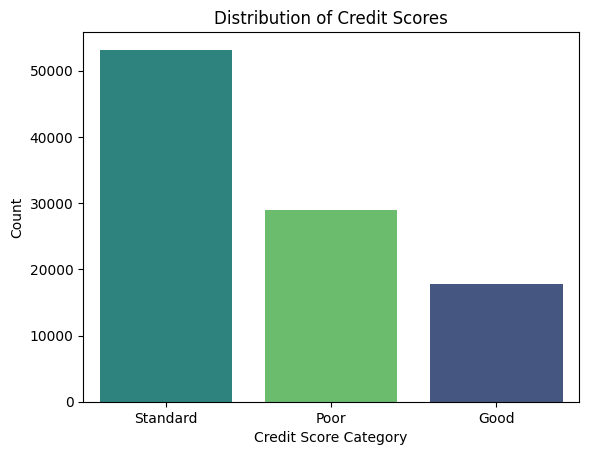

In [17]:
#chart 1 - Distribution of credit scores
#create count plot for credit score distribution
sns.countplot(x = df['Credit_Score'], hue = df['Credit_Score'], palette = 'viridis', order = df['Credit_Score'].value_counts().index)
#Set labels and title
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
#show plot
plt.show()

####  1. Why did i pick this specify chart?
- A count plot is ideal for categorical variables as it visually represents the frequency distribution of different credit scores

2. Wat is/are the insights found from the chart?
- The chart highlights that one credit score category is significantly more frequent than others, indicating a class imbalance in the dataset

- This imbalance suggests that the dataset is skewed toward "Standard" category, which could impact predictive modelling.


3. Will the gained insights help creating a positive business impact?
- are there any insights that lead to negative growth?, justify the specific reason

- understanding the distribution is crucial for predictive modelling
- The imbalance may lead to biased model predictions, which could negatively impact risk assesment for loans.
- addresing this imbalance using techiniques like resampling, or class weighting can improve credit risk management and model fairness

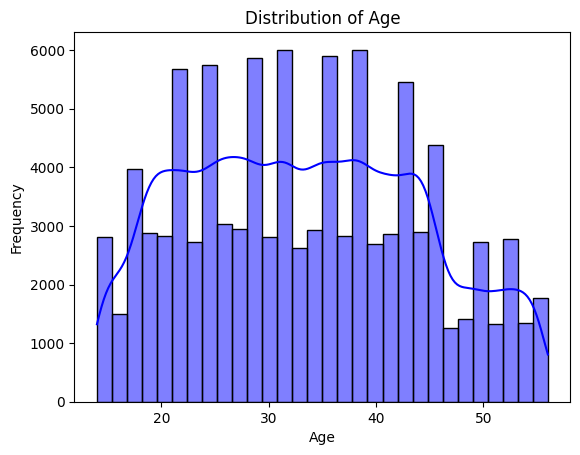

In [18]:
#chart 2 ; Distribution of Age
#create histogram for Age distribution
sns.histplot(df['Age'], bins = 30, kde = True, color = 'blue')

#set labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#show plot
plt.show()

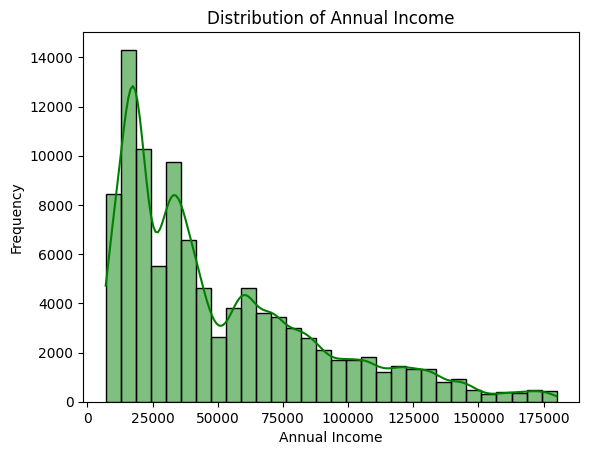

In [19]:
#chart- 3 Annual Income Distribution
#create histogram for Annual Income Distribution

sns.histplot(df['Annual_Income'], bins = 30, kde = True, color = 'green')

#set labels and title
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

#show plot
plt.show()

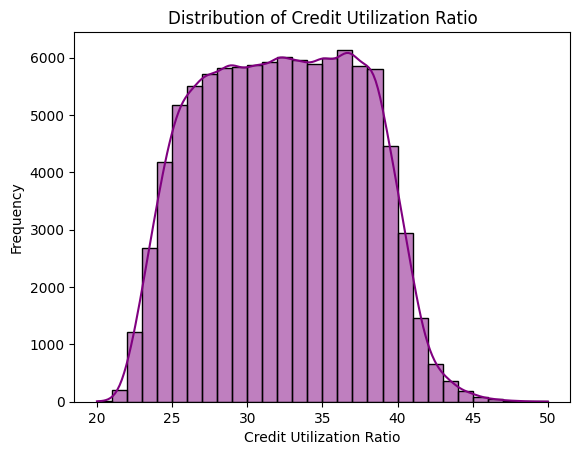

In [20]:
#Chart 4- Credit Histogram for credit Utillization ratio distribution
sns.histplot(df['Credit_Utilization_Ratio'], bins = 30, kde = True, color = 'purple')

#set labels and title
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')

#show plot
plt.show()


1. why did i pick this specific chart?
- a histogram helps in understanding how customers use their available credit, which is a key indictor of credit worthiness and financial behaviour

2. what is/are the insights(s) found from the chart?
- most customers have a credit utillization ratio within 25-40 range
- A portion of customers exhibits high credit utillization which may indicate financial stress or over-reliance on credit
- A lower utillization ratio is generally linked to better credit scores and responsible financial behaviour

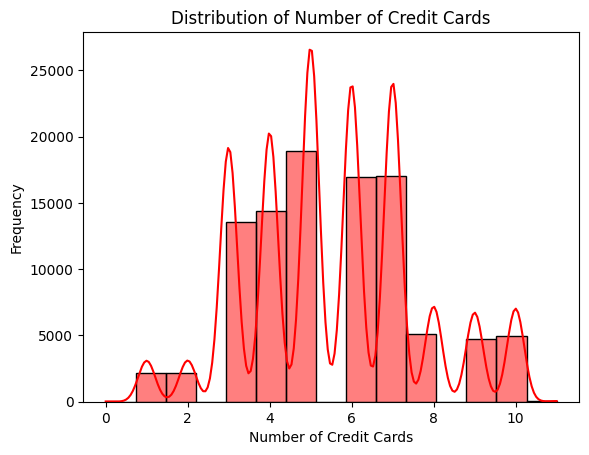

In [21]:
#chart 5 - Number of credit cards distribution
#create histogram for number of credit cards distribution
sns.histplot(df['Num_Credit_Card'], bins = 15, kde = True, color = 'red')

#set labels and title
plt.title('Distribution of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')

#show plot
plt.show()

1. Why did i pick this specific chart??
- A histogram is ideal for showing how many credit cards customers typically hold and understanding their credit behaviour

2. what is/are the insights found from the chart?
- the majority of customers have a small number of credit cards, indicating conservative credit usage.




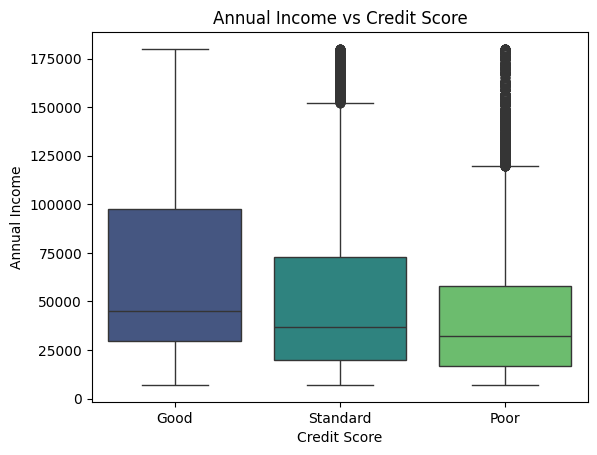

In [22]:
#chart 6 - annual income vc credit score
#create boxplot for annual income across different credit score categories
sns.boxplot(x= 'Credit_Score', y = "Annual_Income", data = df, palette = 'viridis')

#set label and title
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')

#show plot
plt.show()




ML Model Implementation

In [23]:
# Data preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib

# Handle missing values and data cleaning
def preprocess_data(df):
    # Create a copy to avoid modifying original data
    df_processed = df.copy()

    # Handle missing values in Credit_Score
    df_processed = df_processed.dropna(subset=['Credit_Score'])

    # Clean numeric columns that might have string values
    numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                      'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                      'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                      'Amount_invested_monthly', 'Monthly_Balance']

    for col in numeric_columns:
        if col in df_processed.columns:
            # Convert to numeric, replacing non-numeric values with NaN
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
            # Fill NaN with median
            df_processed[col].fillna(df_processed[col].median(), inplace=True)

    # Handle categorical variables
    categorical_columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

    for col in categorical_columns:
        if col in df_processed.columns:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

    return df_processed

# Apply preprocessing
df_clean = preprocess_data(df)


In [24]:
# Feature selection and encoding
def prepare_features(df):
    # Select relevant features for modeling
    feature_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                      'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                      'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                      'Amount_invested_monthly', 'Monthly_Balance', 'Occupation', 'Credit_Mix',
                      'Payment_of_Min_Amount', 'Payment_Behaviour']

    # Create feature matrix
    X = df[feature_columns].copy()
    y = df['Credit_Score'].copy()

    # Encode categorical variables
    label_encoders = {}
    categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

    for col in categorical_cols:
        if col in X.columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le

    # Encode target variable
    target_encoder = LabelEncoder()
    y_encoded = target_encoder.fit_transform(y)

    return X, y_encoded, label_encoders, target_encoder

X, y, label_encoders, target_encoder = prepare_features(df_clean)
print(f"Feature matrix shape: {X.shape}")
print(f"Target classes: {target_encoder.classes_}")


Feature matrix shape: (100000, 20)
Target classes: ['Good' 'Poor' 'Standard']


In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 80000
Test set size: 20000


In [ ]:
# Initialize multiple models for comparison
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use scaled data for Logistic Regression and SVM, original for Random Forest
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    if name in ['Logistic Regression', 'SVM']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Training Random Forest...
Random Forest - Accuracy: 0.8196
Random Forest - CV Score: 0.8112 (+/- 0.0039)

Training Logistic Regression...
Logistic Regression - Accuracy: 0.6371
Logistic Regression - CV Score: 0.6367 (+/- 0.0052)

Training SVM...


In [ ]:
# Detailed evaluation
for name, results in model_results.items():
    print(f"\n{'='*50}")
    print(f"DETAILED EVALUATION FOR {name.upper()}")
    print(f"{'='*50}")

    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Cross-validation Score: {results['cv_mean']:.4f} (+/- {results['cv_std'] * 2:.4f})")

    print("\nClassification Report:")
    print(classification_report(y_test, results['predictions'],
                              target_names=target_encoder.classes_))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, results['predictions'])
    print(cm)

# Find best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['accuracy'])
best_model = model_results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name}")
print(f"Best accuracy: {model_results[best_model_name]['accuracy']:.4f}")


In [ ]:
# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    grid_search = GridSearchCV(
        LogisticRegression(random_state=42, max_iter=1000),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }

    grid_search = GridSearchCV(
        SVC(random_state=42, probability=True),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Final model with best parameters
final_model = grid_search.best_estimator_


In [ ]:
# Feature importance (for tree-based models)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


In [ ]:
# Save the trained model and preprocessing objects
joblib.dump(final_model, 'credit_score_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')

print("Model and preprocessing objects saved successfully!")

# Create prediction function
def predict_credit_score(new_data):
    """
    Predict credit score for new data
    """
    # Load saved objects
    model = joblib.load('credit_score_model.pkl')
    scaler = joblib.load('scaler.pkl')
    label_encoders = joblib.load('label_encoders.pkl')
    target_encoder = joblib.load('target_encoder.pkl')

    # Preprocess new data
    new_data_processed = new_data.copy()

    # Encode categorical variables
    for col, encoder in label_encoders.items():
        if col in new_data_processed.columns:
            new_data_processed[col] = encoder.transform(new_data_processed[col].astype(str))

    # Scale features if needed
    if best_model_name in ['Logistic Regression', 'SVM']:
        new_data_scaled = scaler.transform(new_data_processed)
        predictions = model.predict(new_data_scaled)
        probabilities = model.predict_proba(new_data_scaled)
    else:
        predictions = model.predict(new_data_processed)
        probabilities = model.predict_proba(new_data_processed)

    # Decode predictions
    predicted_scores = target_encoder.inverse_transform(predictions)

    return predicted_scores, probabilities

# Example usage
print("\nModel training completed!")
print(f"Final model: {type(final_model).__name__}")
print(f"Final accuracy: {accuracy_score(y_test, final_model.predict(X_test_scaled if best_model_name in ['Logistic Regression', 'SVM'] else X_test)):.4f}")


In [ ]:
# Create performance visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model comparison
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]

axes[0, 0].bar(model_names, accuracies)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Confusion matrix for best model
cm = confusion_matrix(y_test, model_results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_,
            ax=axes[0, 1])
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Credit score distribution
axes[1, 0].hist(df_clean['Credit_Score'], bins=20, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Credit Score Distribution')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Frequency')

# 4. Cross-validation scores
cv_means = [model_results[name]['cv_mean'] for name in model_names]
cv_stds = [model_results[name]['cv_std'] for name in model_names]

axes[1, 1].bar(model_names, cv_means, yerr=cv_stds, capsize=5)
axes[1, 1].set_title('Cross-Validation Scores')
axes[1, 1].set_ylabel('CV Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
